In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [79]:
dataframe = pd.read_csv('database.csv', na_values=[''])

## Ordering Columns

In [80]:
dataframe.columns.tolist()

['Unnamed: 0',
 'row_close',
 'levelCounter',
 'trial_set',
 'row_start',
 'time_secs',
 'ptcp',
 'feedbackType',
 'correctCounter',
 'Change Flag']

In [81]:
new_order = ['ptcp',
             'trial_set',
             'levelCounter',
             'row_start',
             'row_close',
             'time_secs',
             'feedbackType',
             'correctCounter',
             'Change Flag']

In [82]:
work_df = dataframe[new_order]

## Data Validation

First we need to watch if after the tranformations of the raw-data all conditions look as expected

I am going to start by looking at a participant, set level. We expect 22 participants and 36 trials per set. 

In [83]:
# Group the DataFrame by 'ptcp' and 'trial_set', then count unique values in 'levelCounter'
levels_per_set_per_participant = work_df.groupby(['ptcp', 'trial_set'])['levelCounter'].nunique()

# Display the result
print("\nNumber of levels per set per participant:")
print(levels_per_set_per_participant)


Number of levels per set per participant:
ptcp    trial_set
tsvr06  1            36
        2            36
        3            36
tsvr07  1            36
        2            36
                     ..
tsvr26  2            36
        3            35
tsvr27  1            36
        2            36
        3            35
Name: levelCounter, Length: 66, dtype: int64


Due to a failure in the excecution of the program the last level (35) is missing for most participants that the game presented. We need to remove it for all participants. 

In [84]:
# Group the DataFrame by 'ptcp' and 'trial_set', then count unique values in 'levelCounter'
feedbacktype_per_set_per_participant = work_df.groupby(['ptcp', 'trial_set'])['feedbackType'].count()

# Convert the result to a DataFrame
feedbacktype_per_set_per_participant_df = feedbacktype_per_set_per_participant.reset_index()

# Display result
print(feedbacktype_per_set_per_participant_d)

# Adding flag for missing values 
feedbacktype_per_set_per_participant_df['missing_flag'] = np.where(36 - feedbacktype_per_set_per_participant_check_per_level['feedbackType'] > 0, 1, 0)

# removing 
work_check_per_level2 =  work_df[work_df['levelCounter']<35]

In [85]:
# Group the DataFrame by 'ptcp' and 'trial_set', then count unique values in 'levelCounter'
levels_per_participant = work_df.groupby(['feedbackType']).count()
print(levels_per_participant)

              ptcp  trial_set  levelCounter  row_start  row_close  time_secs  \
feedbackType                                                                   
congruent      784        784           784        778        784        778   
incongruent    784        784           784        777        784        777   
none           790        790           790        786        790        786   

              correctCounter  Change Flag  
feedbackType                               
congruent                727          727  
incongruent              731          731  
none                     735          735  


In [103]:
# Group the DataFrame by 'ptcp' and 'trial_set', then count unique values in 'levelCounter'
check_per_level = work_df2.groupby(['levelCounter','feedbackType']).count()
check_per_level = check_per_level.reset_index()
check_per_level['deviation']= 22-check_per_level['ptcp']
print(check_per_level)



     levelCounter feedbackType  ptcp  trial_set  row_start  row_close  \
0             0.0    congruent    21         21         21         21   
1             0.0  incongruent    22         22         22         22   
2             0.0         none    23         23         23         23   
3             1.0    congruent    23         23         23         23   
4             1.0  incongruent    23         23         23         23   
..            ...          ...   ...        ...        ...        ...   
100          33.0  incongruent    21         21         21         21   
101          33.0         none    25         25         25         25   
102          34.0    congruent    26         26         26         26   
103          34.0  incongruent    19         19         19         19   
104          34.0         none    21         21         21         21   

     time_secs  correctCounter  Change Flag  deviation  
0           21              21           21          1  
1        

Not all the levels have the same amount of stimuli there is a deviation. We will t-test next if this deviation is different from 

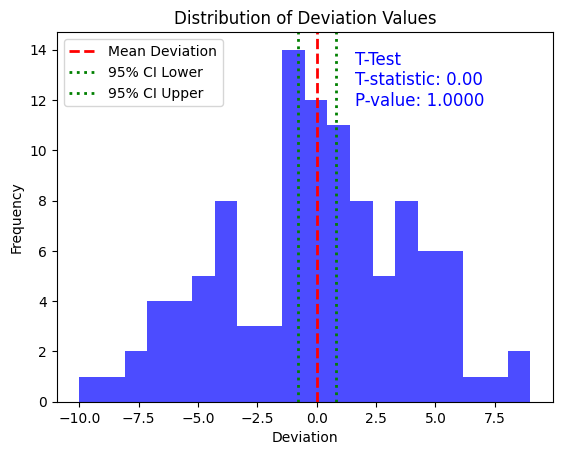

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming your DataFrame is named check_per_level
deviation_values = check_per_level['deviation']

# Create the histogram
plt.hist(deviation_values, bins=20, color='blue', alpha=0.7)
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Deviation Values')

# Calculate the mean and standard error of the mean (SEM)
mean_deviation = np.mean(deviation_values)
sem_deviation = np.std(deviation_values) / np.sqrt(len(deviation_values))

# Calculate the 95% confidence interval
ci_lower = mean_deviation - 1.96 * sem_deviation
ci_upper = mean_deviation + 1.96 * sem_deviation

# Perform a t-test (assuming a population mean of 0)
t_stat, p_value = stats.ttest_1samp(deviation_values, 0)

# Add the confidence interval and t-test result to the plot
plt.axvline(mean_deviation, color='red', linestyle='dashed', linewidth=2, label='Mean Deviation')
plt.axvline(ci_lower, color='green', linestyle='dotted', linewidth=2, label='95% CI Lower')
plt.axvline(ci_upper, color='green', linestyle='dotted', linewidth=2, label='95% CI Upper')

# Add t-test result to the plot
plt.annotate(f'T-Test\nT-statistic: {t_stat:.2f}\nP-value: {p_value:.4f}', xy=(0.6, 0.8), xycoords='axes fraction', fontsize=12, color='blue')

plt.legend(loc='upper left')
plt.show()


In [102]:
check_per_level['deviation']

0      1
1      0
2     -1
3     -1
4     -1
      ..
100    1
101   -3
102   -4
103    3
104    1
Name: deviation, Length: 105, dtype: int64